# 8


---
**Outline**

1. Review
2. Social Networks and the Decision to Insure
3. Birth and the Effect of Education on Wage

---
## Instrumental Variables

- Instrumental Variable find the condition where we can mimic the randomized experiment where it assign the observation in a treatment randomly
- In this case, the variation in treatment has no back door, the only variation we see is because the the effect of treatment
- The process
  - Use the instrument to explain the treatment.
  - Remove any part of treatment not explained by the instrument.
  - Use the instrument to explain the outcome.
  - Remove any outcome part not explain by the instrument.
- Two-Stage Least Square
  - First Stage: Regress X (the treatment variable) on Z (the instrumental variable) and other controls W. Obtain the predicted values of X (let's call them X-hat). $$    X = \gamma_0 + \gamma_1Z+ \gamma_2W+ \nu$$
  - Second Stage: Regress Y (the outcome variable) on X-hat (the predicted values of X from the first stage).
  $$Y = \beta_0 + \beta_1\hat{X} + \beta_2W+ \varepsilon$$
- Instrumental Variable will work under two assumptions:
  - Relevance of the instrument
  - Validity of the instrument

In [3]:
!pip install causalinference
!pip install linearmodels
!pip install causaldata


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for causaldata: filename=causaldata-0.1.5-py3-none-any.whl size=2767646 sha256=1e875f10b659492af12ba566e1ab7103ba03a9f105198217ab940670c56028b8
  Stored in directory: /root/.cache/pip/wheels/a1/03/f7/4feb3ae1964932dc58fe5acfc4bdb02d5df05dd6b8aa2d8437
Successfully built causaldata


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

from linearmodels.iv import IV2SLS
from causaldata import social_insure

#  Social Networks and the Decision to Insure
by Cai, De Janvry, and Sadoulet (2015)

- The case investigate how farmers make decisions regarding purchasing insurance and whether this decision-making process is influenced by information transmitted through social networks.
- Through a randomized experiment conducted in rural China, where households underwent different rounds of informational sessions about insurance, focusing on the second round of sessions, they analyze whether a farmer's likelihood of purchasing insurance is influenced by the insurance-related decisions made by their friends who participated in the first round of sessions.
- The authors employ the variable **FirstRoundDefault** as an instrument for **Friends Purchase Behaviour**. This variable is a binary indicator reflecting whether a person's friends were assigned to an "default buy" informational session, in which insurance was the default option, or a "default no buy" session, where the default was not to buy insurance. Despite all attendees receiving the same information and options, the default conditions differed.
- We will demonstrate how to isolate the effect of **friends' insurance purchase behavior** on an **individual's own purchase behavior**.

## Load Data

In [5]:
social_ins = social_insure.load_pandas().data
social_ins.head()

,address,village,takeup_survey,age,agpop,ricearea_2010,disaster_prob,male,default,intensive,risk_averse,literacy,pre_takeup_rate
0,beilian2,beilian,0,62.0,2.0,10.0,30.0,1.0,1,0,0.0,0.0,0.071429
1,beilian2,beilian,1,63.0,5.0,15.0,100.0,1.0,1,0,0.0,1.0,0.071429
2,beilian2,beilian,1,44.0,3.0,7.5,20.0,1.0,1,1,0.0,1.0,0.071429
3,beilian2,beilian,1,76.0,6.0,NaN,50.0,1.0,1,1,0.6,1.0,0.071429
4,beilian2,beilian,0,52.0,6.0,11.0,0.0,1.0,1,1,0.2,1.0,0.071429


## Two-Stage Least Squares (2 SLS)

In [6]:
# Create an control-variable DataFrame, including dummies for village
control_var = ['male','age','agpop','ricearea_2010','literacy','intensive','risk_averse','disaster_prob']

control = pd.concat([social_ins[control_var],
                     pd.get_dummies(social_ins[['village']]) ],
                    axis = 1)
control.head()

,male,age,agpop,ricearea_2010,literacy,intensive,risk_averse,disaster_prob,village_beilian,village_beixing,...,village_xihu,village_xilian,village_xinguang,village_xingzeng,village_xinlian,village_yanjiang,village_yazhou,village_yongfeng,village_zhangxi,village_zixi
0,1.0,62.0,2.0,10.0,0.0,0,0.0,30.0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,63.0,5.0,15.0,1.0,0,0.0,100.0,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,44.0,3.0,7.5,1.0,1,0.0,20.0,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,76.0,6.0,NaN,1.0,1,0.6,50.0,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,52.0,6.0,11.0,1.0,1,0.2,0.0,True,False,...,False,False,False,False,False,False,False,False,False,False


$$Y = \beta_0 + \beta_1\hat{X} + \beta_2W+ \varepsilon$$

In [7]:
# Create model and fit separately, since we want to cluster, and will use m.notnull to see which observations to drop

m = IV2SLS(dependent = social_ins['takeup_survey'],
           exog = control,
           endog = social_ins['pre_takeup_rate'],
           instruments = social_ins['default'])

second_stage = m.fit(cov_type = 'clustered', clusters = social_ins['address'][m.notnull])

print(second_stage.params["pre_takeup_rate"])

/usr/local/lib/python3.11/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


0.7910969602184081


The coefficient of pre_takeup_rate is the actual outcome of you buying insurance as the outcome.
- A one-unit increase in the rate at which your friends buy insurance, using only the random variation driven by the random experimental assignment and the controls, increases your chances of buying insurance by .791.
- That’s a pretty strong spillover effect!

We can also get the estimate from the first stage model from IV2SLS

$$X = \gamma_0 + \gamma_1Z+ \gamma_2W+ \nu$$

In [8]:
model = IV2SLS(dependent = social_ins['pre_takeup_rate'],
               exog = pd.concat([control, social_ins['default']],axis = 1),
               endog = None,
               instruments = None)

first_stage = model.fit(cov_type = 'clustered', clusters = social_ins['address'][model.notnull])

print(first_stage.params["default"])

0.11802574337143477


/usr/local/lib/python3.11/dist-packages/linearmodels/iv/model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


- The first stage regression has the endogenous variable (whether your friends purchased insurance) as the dependent variable, and a coefficient for our instrument.
- The coefficient is .118 and statistically significant.
- It’s showing that your friends being assigned to the “default-buy” experimental condition leads to a 11.8 percentage point increase in the probability that they’ll buy insurance.
- We predict whether your friends bought insurance using that .118 bump (as well as the other predictors not shown on the table) and use those predicted values in the second stage.
- The randomized nature of **FirstRoundDefault** lends credibility to its role as a valid instrument, further supported by the substantial twelve percentage point difference, which meets the relevance assumption.

In [9]:
first_stage = sm.ols("pre_takeup_rate ~  male + age + agpop + ricearea_2010 + literacy + intensive + risk_averse + disaster_prob + C(village) + default",
                      data = social_ins).fit()

print("q4 coeff estimate:, ", first_stage.params["default"])
print("q4 p-value:, ", first_stage.pvalues["default"])

q4 coeff estimate:,  0.11802574337143475
q4 p-value:,  4.693323493054744e-26


In [10]:
second_stage = sm.ols("takeup_survey ~ male + age + agpop + ricearea_2010 + literacy + intensive + risk_averse + disaster_prob + C(village) + default",
                       data = social_ins).fit()

print("q4 coeff estimate:, ", second_stage.params["default"])
print("q4 p-value:, ", second_stage.pvalues["default"])

q4 coeff estimate:,  0.09336980680866352
q4 p-value:,  0.0013653943728173506


In [11]:
second_stage.params["default"]/first_stage.params["default"]

np.float64(0.7910969602184383)

#  Birth and The Effect of Education on Wage

In [14]:
# Install package
!pip install causalgraphicalmodels graphviz

# Perbaiki bug Python >=3.10
!sed -i 's/from collections import Iterable/from collections.abc import Iterable/' /usr/local/lib/python3.*/dist-packages/causalgraphicalmodels/cgm.py


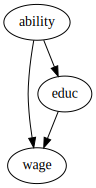

In [15]:
from causalgraphicalmodels import CausalGraphicalModel

# Create causal diagram
education_wage = CausalGraphicalModel(nodes=["ability", "educ", "wage"],
                                       edges=[("ability", "educ"),
                                              ("ability", "wage"),
                                              ("educ", "wage")])

# Draw return a graphviz object
education_wage.draw()

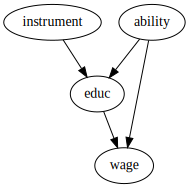

In [16]:
# Create causal diagram
education_wage = CausalGraphicalModel(nodes=["ability", "educ", "wage", "instrument"],
                                       edges=[("ability", "educ"),
                                              ("ability", "wage"),
                                              ("educ", "wage"),
                                              ("instrument", "educ")])

# Draw return a graphviz object
education_wage.draw()

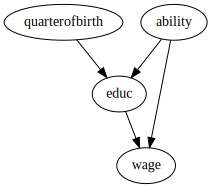

In [17]:
# Create causal diagram
education_wage = CausalGraphicalModel(nodes=["ability", "educ", "wage", "quarterofbirth"],
                                       edges=[("ability", "educ"),
                                              ("ability", "wage"),
                                              ("educ", "wage"),
                                              ("quarterofbirth", "educ")])

# Draw return a graphviz object
education_wage.draw()

## Load Data

- We can use dataset from three census surveys conducted every ten years, which is the same dataset that Angrist and Krueger employed in their [paper](https://www.jstor.org/stable/2937954) on instrumental variables.
- This dataset contains details about natural logarithm of wages (the variable we're interested in), as well as years of education (our manipulated factor).
- Additionally, it encompasses information about the quarter in which individuals were born, which serves as our instrumental variable, along with supplementary factors like birth year and birth state that can be controlled for.

In [18]:
schooling = pd.read_csv("ak91.csv")
schooling.head()

,log_wage,years_of_schooling,year_of_birth,quarter_of_birth,state_of_birth
0,5.790019,12.0,30.0,1.0,45.0
1,5.952494,11.0,30.0,1.0,45.0
2,5.315949,12.0,30.0,1.0,45.0
3,5.595926,12.0,30.0,1.0,45.0
4,6.068915,12.0,30.0,1.0,37.0


## Checking Assumption

In [19]:
grouped_schooling = schooling.groupby(["year_of_birth", "quarter_of_birth"])[["log_wage", "years_of_schooling"]]

group_data = (grouped_schooling
              .mean()
              .reset_index()
              .assign(time_of_birth = lambda d: d["year_of_birth"] + (d["quarter_of_birth"])/4))
group_data.head()

,year_of_birth,quarter_of_birth,log_wage,years_of_schooling,time_of_birth
0,30.0,1.0,5.889133,12.280405,30.25
1,30.0,2.0,5.898007,12.428418,30.50
2,30.0,3.0,5.909365,12.491860,30.75
3,30.0,4.0,5.914354,12.624675,31.00
4,31.0,1.0,5.902136,12.540434,31.25


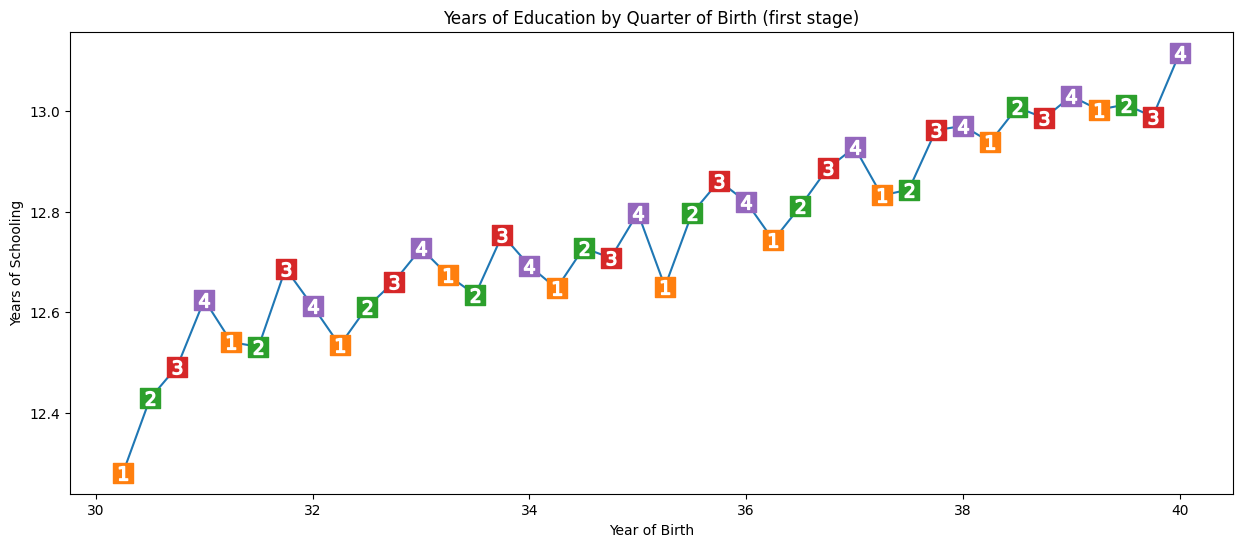

In [20]:
plt.figure(figsize=(15,6))
plt.plot(group_data["time_of_birth"], group_data["years_of_schooling"], zorder=-1)

for q in range(1, 5):
    x = group_data.query(f"quarter_of_birth=={q}")["time_of_birth"]
    y = group_data.query(f"quarter_of_birth=={q}")["years_of_schooling"]

    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Years of Education by Quarter of Birth (first stage)")
plt.xlabel("Year of Birth")
plt.ylabel("Years of Schooling");

- Surprisingly, a distinct seasonal pattern emerges in the years of schooling data, aligning with an individual's quarter of birth.
- Upon visual inspection, it becomes evident that individuals born in the first quarter of the year consistently exhibit lower levels of education compared to those born in the last quarter.
- This observation holds true even after accounting for the birth year, considering that individuals born in later years tend to have higher average education levels overall.
- This preliminary visual analysis highlights a potentially significant relationship between quarter of birth and education, warranting further investigation to understand its implications for our research on education's impact on earnings.

Another way to check if the instrument is relevant, we can employ the first stage model and see the coefficient of the instrument




In [21]:
# Preparing the data, create 4 new columns denoting the quarter of birth

factor_data = schooling.assign(**{f"q{int(q)}": (schooling["quarter_of_birth"] == q).astype(int)
                             for q in schooling["quarter_of_birth"].unique()})

factor_data.head()

,log_wage,years_of_schooling,year_of_birth,quarter_of_birth,state_of_birth,q1,q2,q3,q4
0,5.790019,12.0,30.0,1.0,45.0,1,0,0,0
1,5.952494,11.0,30.0,1.0,45.0,1,0,0,0
2,5.315949,12.0,30.0,1.0,45.0,1,0,0,0
3,5.595926,12.0,30.0,1.0,45.0,1,0,0,0
4,6.068915,12.0,30.0,1.0,37.0,1,0,0,0


## Two-Stage Least Squares (2 SLS)


In [22]:
first_model = sm.ols("years_of_schooling ~ C(year_of_birth) + C(state_of_birth) + q4", data = factor_data).fit()

print("q4 coeff estiAmate:, ", first_model.params["q4"])
print("q4 p-value:, ", first_model.pvalues["q4"])

q4 coeff estiAmate:,  0.10085809272787055
q4 p-value:,  5.464829416599837e-15


In [23]:
second_model = sm.ols("log_wage ~ C(year_of_birth) + C(state_of_birth) + q4", data=factor_data).fit()

print("q4 coeff estimate:, ", second_model.params["q4"])
print("q4 p-value:, ", second_model.pvalues["q4"])

q4 coeff estimate:,  0.008603484260141542
q4 p-value:,  0.001494912718363033


### Estimated Effect

In [24]:
second_model.params["q4"] / first_model.params["q4"]

np.float64(0.08530286492086424)

In [25]:
# another way to use iv2sls is by passing formula

formula = 'log_wage ~ 1 + C(year_of_birth) + C(state_of_birth) + [years_of_schooling ~ q4]'

iv2sls = IV2SLS.from_formula(formula, factor_data).fit()

iv2sls.params["years_of_schooling"]

np.float64(0.08530286490232158)

### Multiple Instrument

In [26]:
formula = 'log_wage ~ 1 + C(year_of_birth) + C(state_of_birth) + [years_of_schooling ~ q1 + q2 + q3]'

iv_many_zs = IV2SLS.from_formula(formula, factor_data).fit()

iv_many_zs.params["years_of_schooling"]

np.float64(0.1076937048894525)